In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='unicode_escape' )

In [4]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [7]:
df.nunique()

rank                                       995
Youtuber                                   995
subscribers                                289
video views                                988
category                                    18
Title                                      992
uploads                                    777
Country                                     49
Abbreviation                                49
channel_type                                14
video_views_rank                           953
country_rank                               246
channel_type_rank                          286
video_views_for_the_last_30_days           908
lowest_monthly_earnings                    557
highest_monthly_earnings                   736
lowest_yearly_earnings                     757
highest_yearly_earnings                    419
subscribers_for_last_30_days                53
created_year                                19
created_month                               12
created_date 

In [8]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [11]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [12]:
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['category'].fillna(df['category'].mode()[0], inplace=True)
df['Abbreviation'].fillna(df['Abbreviation'].mode()[0], inplace=True)
df['channel_type'].fillna(df['channel_type'].mode()[0], inplace=True)

In [13]:
df['video_views_rank'].fillna(df['video_views_rank'].mean(), inplace=True)
df['country_rank'].fillna(df['country_rank'].mean(), inplace=True)
df['channel_type_rank'].fillna(df['channel_type_rank'].mean(), inplace=True)
df['video_views_for_the_last_30_days'].fillna(df['video_views_for_the_last_30_days'].mean(), inplace=True)
df['subscribers_for_last_30_days'].fillna(df['subscribers_for_last_30_days'].mean(), inplace=True)
df['Gross tertiary education enrollment (%)'].fillna(df['Gross tertiary education enrollment (%)'].mean(), inplace=True)
df['Population'].fillna(df['Population'].mean(), inplace=True)
df['Unemployment rate'].fillna(df['Unemployment rate'].mean(), inplace=True)
df['Urban_population'].fillna(df['Urban_population'].mean(), inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

In [14]:
df[df['created_year']==0]
df[df['created_month']==0]
df[df['created_date']==0]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude


In [15]:
df.isnull().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               5
created_month                              5
created_date                               5
Gross tert

In [16]:
df_indo = df[df['Country'] == 'Indonesia']
df_indo.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
117,118,Jess No Limit,34000000,3.963007e+09,Entertainment,Jess No Limit,2284,Indonesia,ID,Entertainment,...,5.500000e+06,2017.0,9.0,7.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327
129,130,Ricis Official,33300000,5.994137e+09,People & Blogs,Ricis Official,2736,Indonesia,ID,Entertainment,...,1.900000e+06,2016.0,1.0,15.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327
159,160,AH,30400000,4.332275e+09,Entertainment,AH,2197,Indonesia,ID,Entertainment,...,3.490791e+05,2014.0,1.0,26.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327
221,222,Indosiar,25900000,1.137207e+10,Music,Indosiar,65286,Indonesia,ID,Entertainment,...,6.000000e+05,2013.0,9.0,23.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327
230,231,Rans Entertainment,25400000,6.430853e+09,People & Blogs,Rans Entertainment,3716,Indonesia,ID,Entertainment,...,1.000000e+05,2015.0,12.0,27.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327


In [17]:
df_indo.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,28.000000,2.800000e+01,2.800000e+01,28.000000,2.800000e+01,28.000000,28.000000,2.800000e+01,28.000000,2.800000e+01,...,2.800000e+01,28.000000,28.000000,28.000000,2.800000e+01,28.0,2.800000e+01,28.0,28.000000,28.000000
mean,528.107143,1.907500e+07,5.393238e+09,24225.750000,1.563072e+05,161.357143,302.535714,1.693890e+08,21882.536429,3.520643e+05,...,5.425941e+05,2015.142857,5.857143,17.357143,3.630000e+01,270203917.0,4.690000e+00,151509724.0,-0.789275,113.921327
std,252.252275,6.055155e+06,3.626400e+09,59209.254551,6.787386e+05,760.989766,1160.321874,4.316836e+08,29149.921078,4.705175e+05,...,1.063736e+06,2.563480,4.043415,8.911974,7.235813e-15,0.0,9.044766e-16,0.0,0.000000,0.000000
min,118.000000,1.240000e+07,1.066458e+07,15.000000,2.510000e+02,1.000000,17.000000,8.500000e+01,0.000000,0.000000e+00,...,1.000000e+00,2007.000000,1.000000,2.000000,3.630000e+01,270203917.0,4.690000e+00,151509724.0,-0.789275,113.921327
25%,365.500000,1.497500e+07,3.191799e+09,724.000000,9.052500e+02,9.500000,33.750000,1.911275e+07,4300.000000,6.875000e+04,...,1.000000e+05,2014.000000,1.000000,7.750000,3.630000e+01,270203917.0,4.690000e+00,151509724.0,-0.789275,113.921327
50%,515.500000,1.740000e+07,4.429273e+09,2304.500000,1.743500e+03,18.500000,63.000000,4.699250e+07,11200.000000,1.787500e+05,...,3.245396e+05,2015.500000,7.000000,19.500000,3.630000e+01,270203917.0,4.690000e+00,151509724.0,-0.789275,113.921327
75%,691.250000,2.072500e+07,6.621968e+09,3739.500000,3.461750e+03,26.250000,133.500000,1.316670e+08,28925.000000,4.624250e+05,...,3.490791e+05,2017.000000,9.000000,25.250000,3.630000e+01,270203917.0,4.690000e+00,151509724.0,-0.789275,113.921327
max,977.000000,3.400000e+07,1.416952e+10,269050.000000,3.539124e+06,4044.000000,6217.000000,2.292000e+09,136800.000000,2.200000e+06,...,5.500000e+06,2019.000000,12.000000,29.000000,3.630000e+01,270203917.0,4.690000e+00,151509724.0,-0.789275,113.921327


####cek outlier

In [18]:
numerical_col = df_indo.select_dtypes(exclude='object')
numerical_col = numerical_col.loc[:, numerical_col.columns != 'category']
numerical_col.head(4)

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
117,118,34000000,3.963007e+09,2284,1882.0,1.0,33.0,547141000.0,136800.0,2200000.0,...,5.500000e+06,2017.0,9.0,7.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327
129,130,33300000,5.994137e+09,2736,1043.0,2.0,34.0,157101000.0,39300.0,628400.0,...,1.900000e+06,2016.0,1.0,15.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327
159,160,30400000,4.332275e+09,2197,1701.0,4.0,46.0,21440000.0,5400.0,85800.0,...,3.490791e+05,2014.0,1.0,26.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327
221,222,25900000,1.137207e+10,65286,358.0,5.0,60.0,230183000.0,57500.0,920700.0,...,6.000000e+05,2013.0,9.0,23.0,36.3,270203917.0,4.69,151509724.0,-0.789275,113.921327


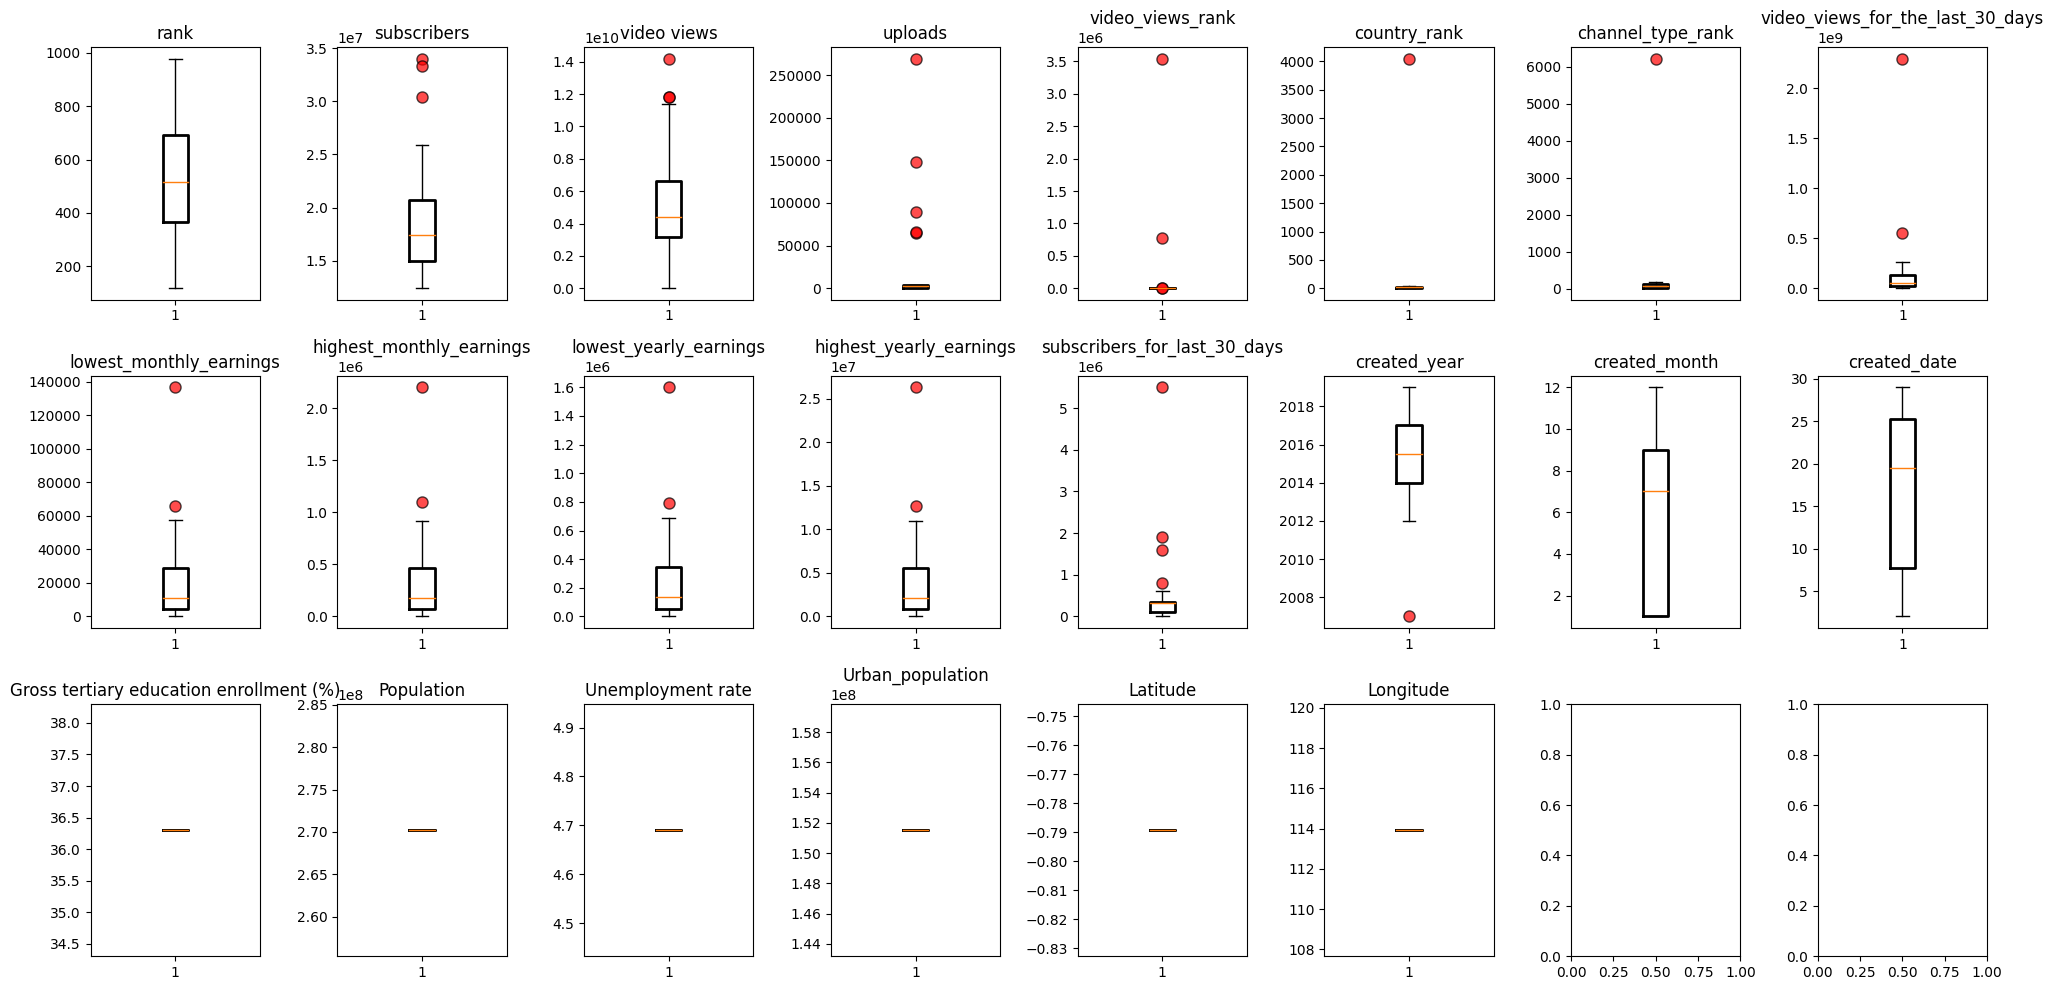

In [19]:
# Pastikan ukuran figur (figsize) mencukupi untuk menampung semua subplot
fig, axes = plt.subplots(nrows=3, ncols=8, figsize=(20, 10))

# Plot boxplot untuk setiap kolom dan tandai outlier
axes = axes.flatten()  # Menggabungkan matriks subplot menjadi array 1 dimensi
boxprops = dict(color='k', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', alpha=0.7)

for i, (col, ax) in enumerate(zip(numerical_col.columns, axes)):
    ax.boxplot(numerical_col[col], boxprops=boxprops, flierprops=flierprops)
    ax.set_title(col)

plt.tight_layout()
plt.show()

IQR

In [20]:
#menghitung nilai IQR

Q1 = df_indo['subscribers'].quantile(0.25) #mencari nilai minimun
Q3 = df_indo['subscribers'].quantile(0.75) #mencari nilai maksimum
IQR = Q3-Q1                                            #menghitung IQR

print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR subscribers = ', IQR)

Q1 =  14975000.0
Q3 =  20725000.0
IQR subscribers =  5750000.0


In [21]:
#memerikasa outlier

nilai_min = df_indo['subscribers'].min()    #mencari nilai minimum
nilai_max = df_indo['subscribers'].max()    #mencari nilai maksimum

min_IQR = Q1 - 1.5 * IQR    #menghitung nilai minimum IQR
max_IQR = Q3 + 1.5 * IQR    #menghitung nilai maksimum IQR

#buat kondisi untuk mencari low outlier
if (nilai_min < min_IQR) :
    print('Low outlier is found < ', min_IQR)
    print('Low outlier index : ', list(df_indo[df_indo['subscribers'] < min_IQR].index ))  #menampilkan indeks low outlier

#buat kondisi untuk mencari high outlier
if (nilai_max > max_IQR) :
    print('High outlier is found > ', max_IQR)
    print('High outlier index : ', list(df_indo[df_indo['subscribers'] > max_IQR].index ))  #menampilkan indeks low outlier

High outlier is found >  29350000.0
High outlier index :  [117, 129, 159]


##Data Analysis

Text(0.5, 1.0, 'Most Youtuber Poppular in indonesia')

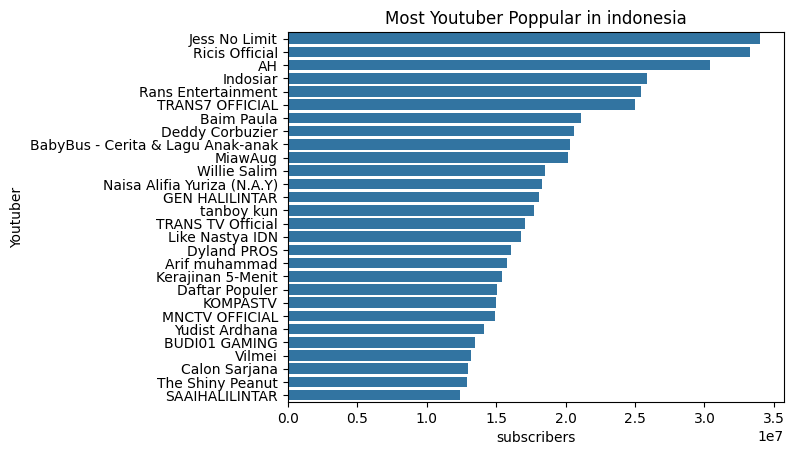

In [22]:
sns.barplot(y='Youtuber', x='subscribers',data=df_indo)
plt.title('Most Youtuber Poppular in indonesia')

<ipython-input-30-48897ae53735>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




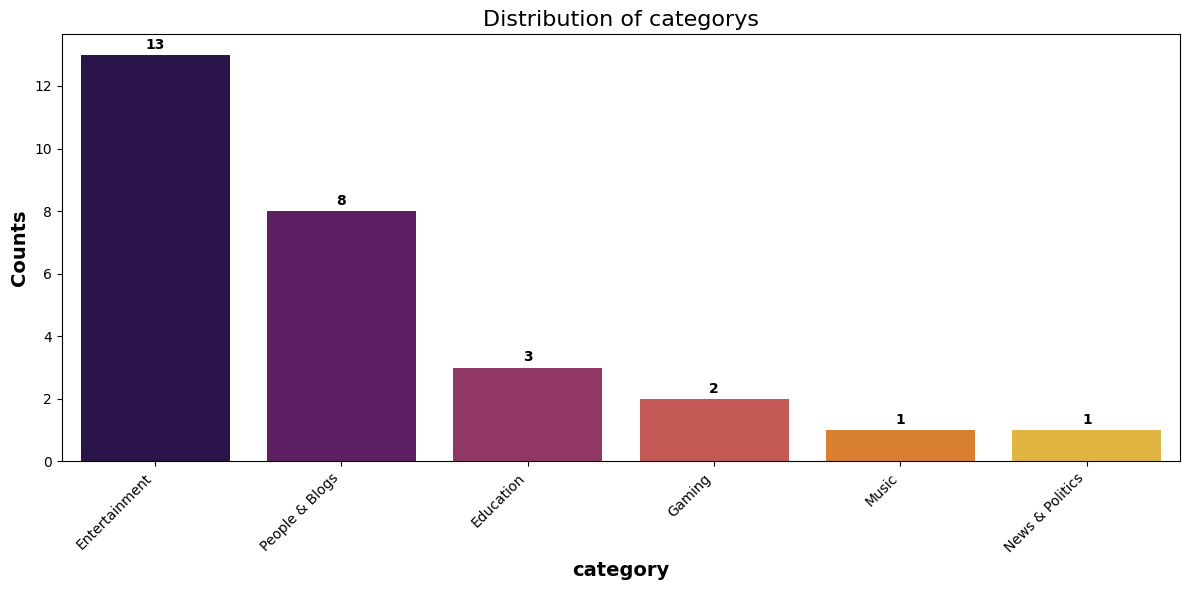

In [30]:
category = df_indo['category'].value_counts()
colors = sns.color_palette('inferno', len(category))

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=category.index, y=category, palette=colors)

# Adding data labels
for i, count in enumerate(category):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adding labels and title
plt.xlabel('category', fontsize=14, fontweight='bold')
plt.ylabel('Counts', fontsize=14, fontweight='bold')
plt.title('Distribution of categorys', fontsize=16)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

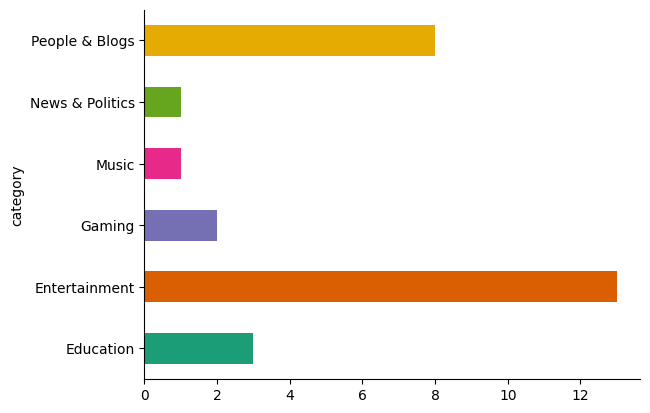

In [36]:
df_indo.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [35]:
df_indo['category'].value_counts()

Entertainment      13
People & Blogs      8
Education           3
Gaming              2
Music               1
News & Politics     1
Name: category, dtype: int64

In [ ]:
df_indo[['Youtuber','video views']]

Upload video terbanyak terbanyak

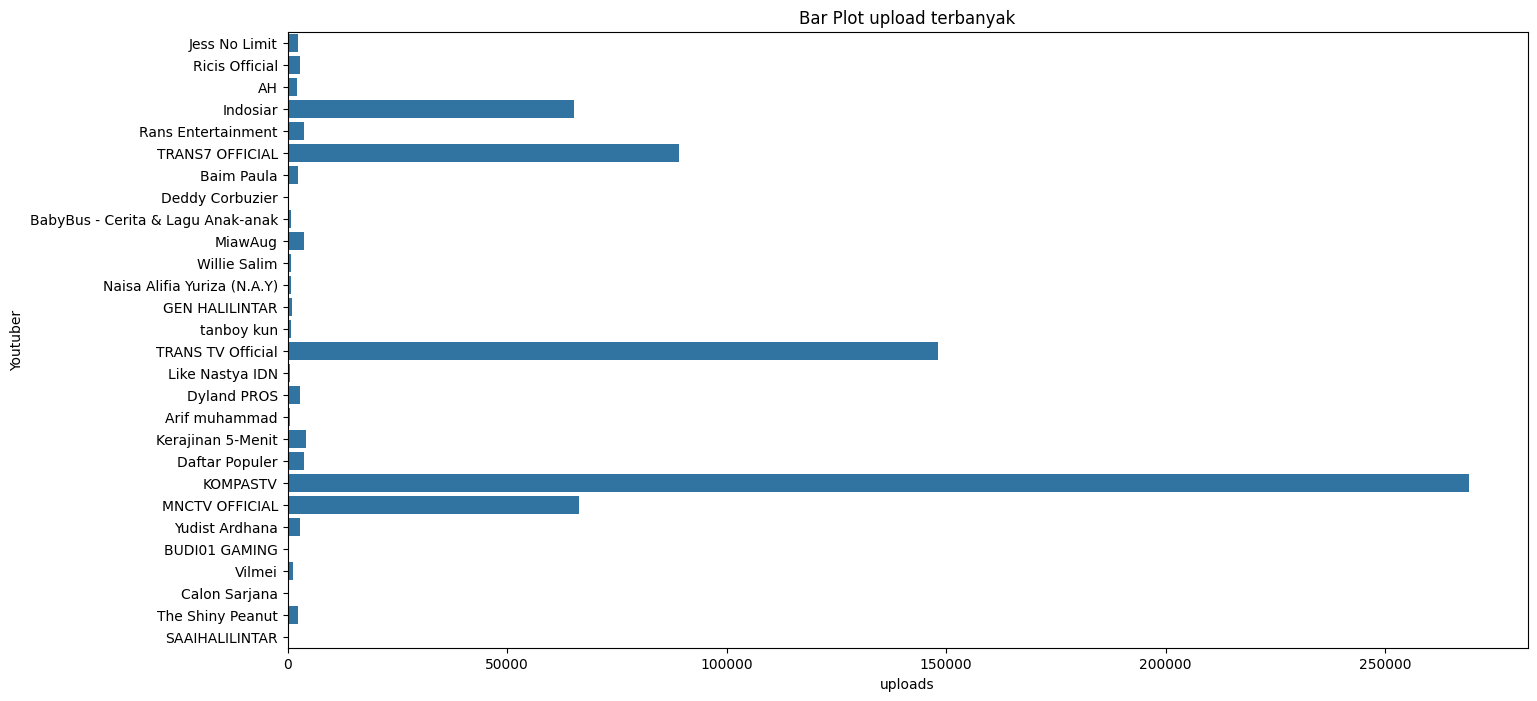

In [27]:
plt.figure(figsize=(16, 8))
sns.barplot(x='uploads', y='Youtuber', data=df_indo)
plt.title('Bar Plot upload terbanyak')
plt.show()


highest yearly earnings and Youtuber  
youtuber pendapatan pertahun terbesar

In [41]:
top_10_youtuber = df_indo[['Youtuber','highest_yearly_earnings','created_year','category']].sort_values(by='highest_yearly_earnings', ascending=False).head(10)
fig = px.bar(top_10_youtuber, x='highest_yearly_earnings', y='Youtuber')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [ ]:
df_indo[['video views','uploads']].sort_values(by='uploads', ascending=False)

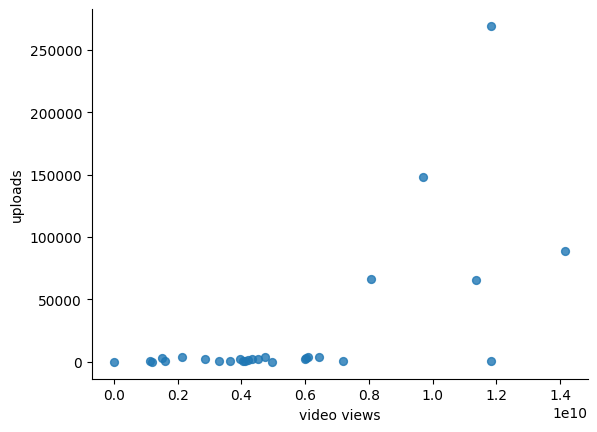

In [44]:
df_indo.plot(kind='scatter', x='video views', y='uploads', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_indo[['Youtuber', 'video views', 'subscribers']].sort_values(by='subscribers', ascending=False)

Regresi linear

In [31]:
import statsmodels.api as sm

X = df_indo['video views']
X = sm.add_constant(X)
y = df_indo['highest_yearly_earnings']

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     highest_yearly_earnings   R-squared:                       0.057
Model:                                 OLS   Adj. R-squared:                  0.021
Method:                      Least Squares   F-statistic:                     1.576
Date:                     Tue, 23 Jan 2024   Prob (F-statistic):              0.221
Time:                             01:11:12   Log-Likelihood:                -473.48
No. Observations:                       28   AIC:                             951.0
Df Residuals:                           26   BIC:                             953.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------


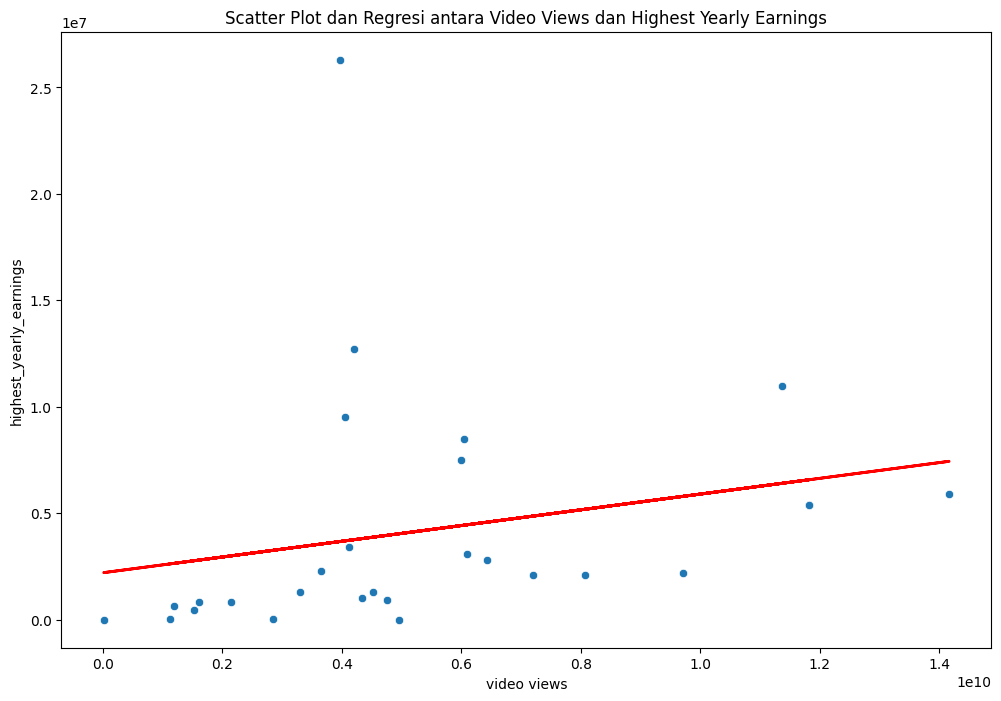

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='video views', y='highest_yearly_earnings', data=df_indo)
plt.plot(df_indo['video views'], model.predict(), color='red', linewidth=2)
plt.title('Scatter Plot dan Regresi antara Video Views dan Highest Yearly Earnings')
plt.show()


###Machine Learning

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'Kategori'
df_indo['Kategori_Encoded'] = label_encoder.fit_transform(df_indo['category'])

# Menampilkan DataFrame setelah label encoding
print(df_indo)

In [58]:
features = ['video views', 'subscribers', 'highest_yearly_earnings', 'Kategori_Encoded']

In [59]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_indo[features])

In [64]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [70]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [71]:
df_indo['cluster'] = labels
df_indo.shape

<ipython-input-71-29f0412b34f5>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(28, 31)

In [ ]:
df_indo.groupby('cluster')[features].mean()

In [79]:
def clustering(df_indo, col1, col2):
    # Define the unique cluster labels
    unique_clusters = df_indo['cluster'].unique()
    # Define colors for each cluster
    colors = ['green', 'yellow', 'red']  # Add more colors as needed
    # Create a scatter plot for each cluster
    plt.figure(figsize=(8, 6))
    for i, cluster_label in enumerate(unique_clusters):
        cluster_df = df_indo[df_indo['cluster'] == cluster_label]
        plt.scatter(cluster_df[col1], cluster_df[col2], color=colors[i], label=f'Cluster {cluster_label}')

    # Add labels and legend
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()

    # Set the plot title using an f-string
    plt.title(f'How {col1} and {col2} ')

    # Show the plot after all clusters have been plotted
    plt.show()


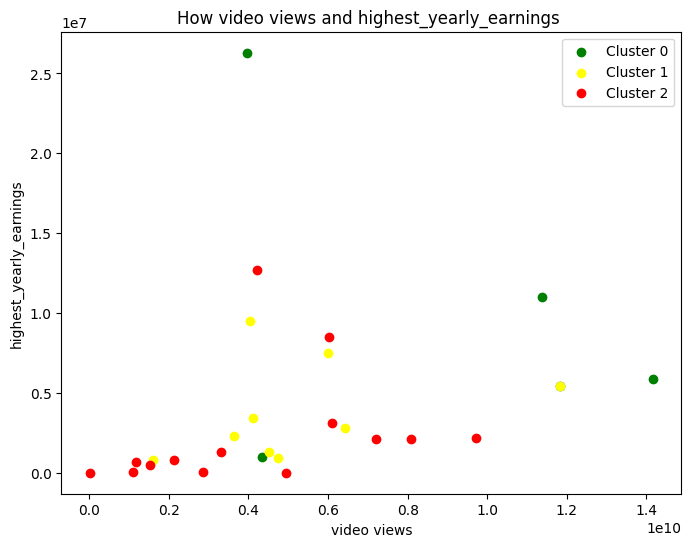

In [80]:
clustering(df_indo, 'video views','highest_yearly_earnings')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-77-b51a83c1ea4f>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



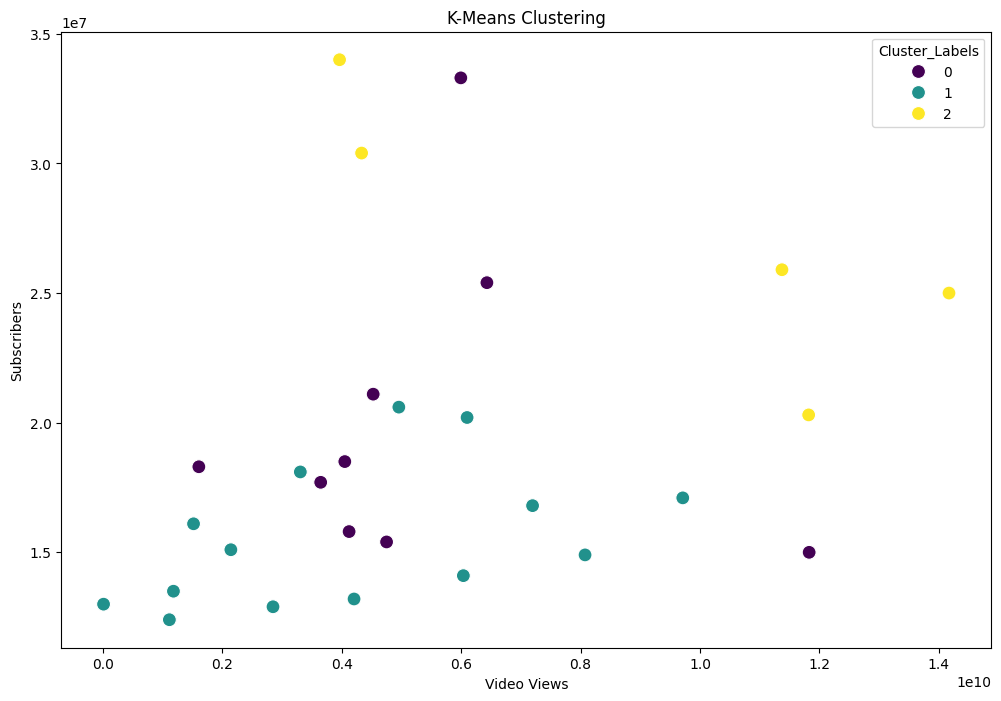

In [77]:
# Pilih jumlah cluster yang diinginkan (gantilah sesuai kebutuhan)
num_clusters = 3

# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit model pada data
kmeans.fit(data_scaled)

# Tambahkan label cluster ke DataFrame
df_indo['Cluster_Labels'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(12, 8))
sns.scatterplot(x='video views', y='subscribers', hue='Cluster_Labels', data=df_indo, palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Video Views')
plt.ylabel('Subscribers')
plt.show()